In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_cn = pd.read_csv("data_final/cn_news_scored.csv")
df_us = pd.read_csv("data_final/us_news_scored.csv")

df_cn["date"] = pd.to_datetime(df_cn["time"])
df_us["date"] = pd.to_datetime(df_us["Date"])

df_cn = df_cn[["date", "Headlines", "score"]].copy()
df_us = df_us[["date", "Headlines", "score"]].copy()

df_cn["country"] = "China"
df_us["country"] = "US"

df_all = pd.concat([df_cn, df_us], ignore_index=True)

df_daily = df_all.groupby(["date", "country"])["score"].mean().reset_index(name="avg_sentiment")

df_pivot = df_daily.pivot(index="date", columns="country", values="avg_sentiment")


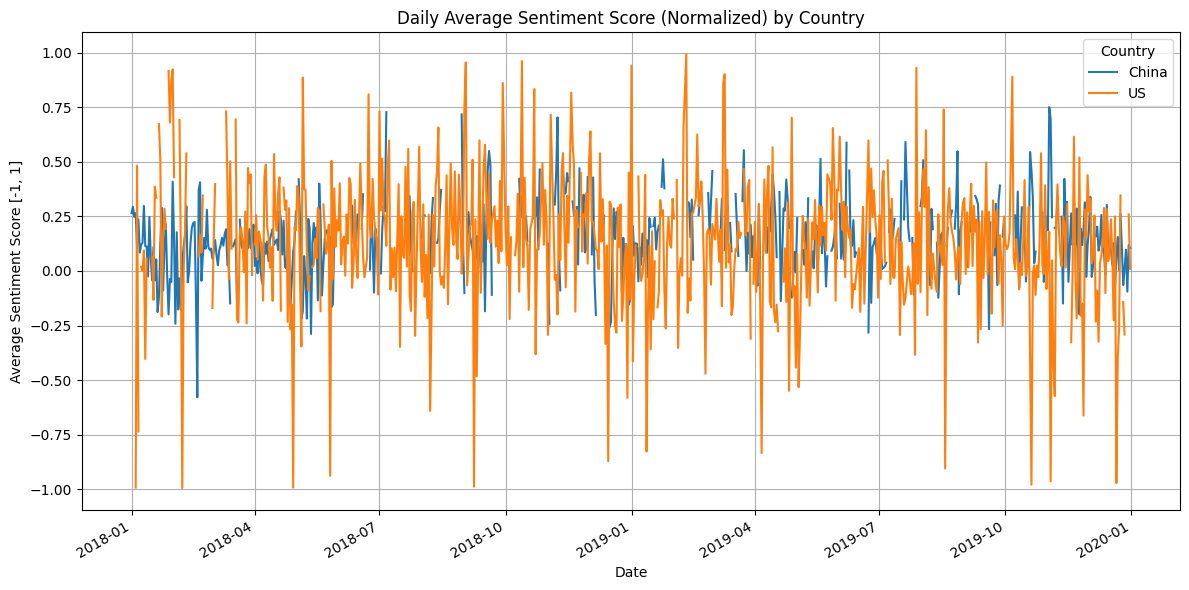

In [ ]:

plt.figure(figsize=(12, 6))
df_pivot.plot(ax=plt.gca())
plt.title("Daily Average Sentiment Score (Normalized) by Country")
plt.ylabel("Average Sentiment Score [-1, 1]")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.legend(title="Country")
plt.show()


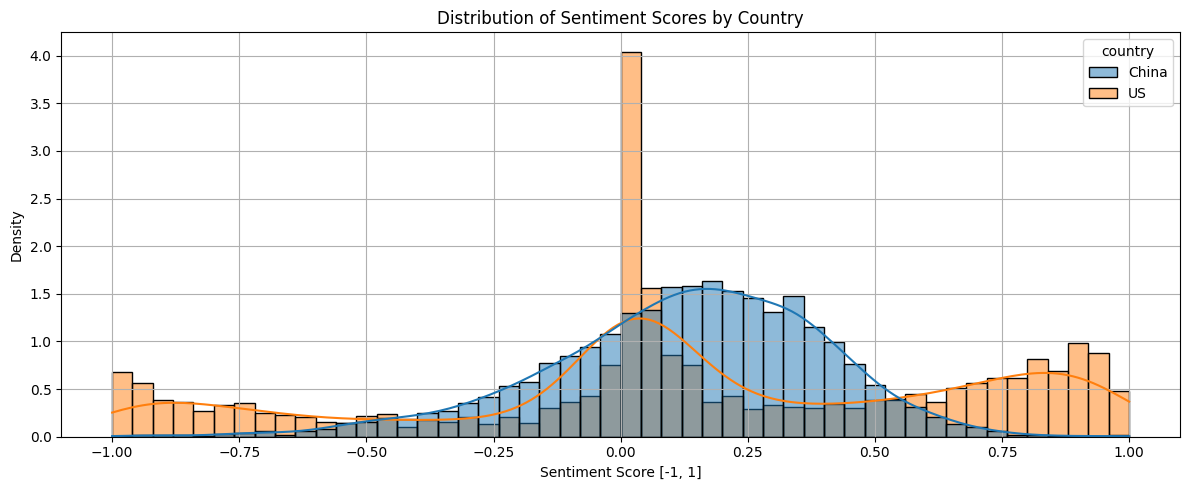

In [6]:
plt.figure(figsize=(12, 5))
sns.histplot(data=df_all, x="score", hue="country", bins=50, kde=True, stat="density", common_norm=False)
plt.title("Distribution of Sentiment Scores by Country")
plt.xlabel("Sentiment Score [-1, 1]")
plt.ylabel("Density")
plt.grid(True)
plt.tight_layout()
plt.show()

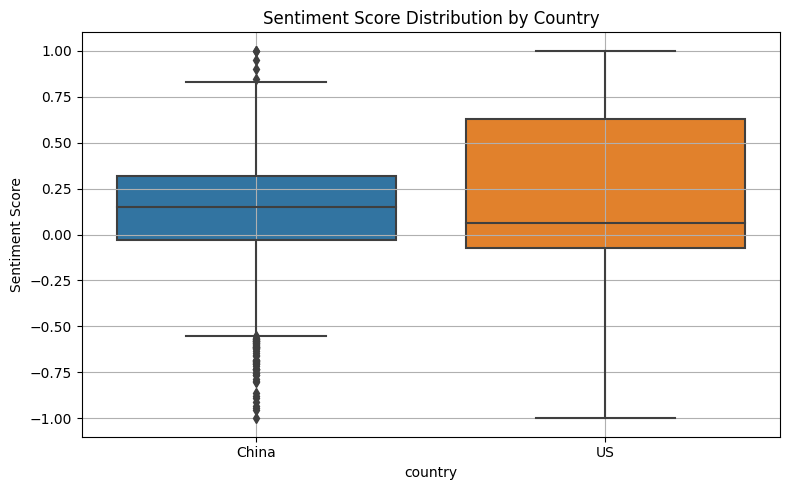

In [7]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_all, x="country", y="score")
plt.title("Sentiment Score Distribution by Country")
plt.ylabel("Sentiment Score")
plt.grid(True)
plt.tight_layout()
plt.show()